# Climatology and Anomalies

It is very common in climate data analysis to look primarily at `anomalies` or departures from normal, where normal is defined by the `climatology` or seasonal cycle. 

We typically wish to research and understand other aspects of the climate system than the seasonal cycle which is well understood due to differences in 
solar radiation associated with the tilt of the Earth's axis. 

In simple terms, no one is impressed if we can say it will be warm in the summer or cold in the winter or if we can say it will rain in the rainy season and be dry during the dry season.  

Therefore, we typically perform our climate data analysis on anomalies by first calculating and removing the climatology.

### Let's read in some data and calculate a climatology....

#### Imports

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

### Read in monthly temperature data

In [2]:
path='/shared/obs/gridded/GHCN_CAMS/'
file='air.mon.mean.nc'

In [3]:
ds=xr.open_dataset(path+file)
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 867)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-03-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html

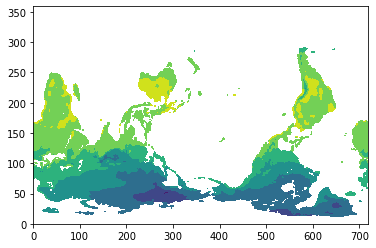

In [4]:
plt.contourf(ds['air'][0,:,:])

#### Reverse our latitudes

In [5]:
ds=ds.reindex(lat=list(reversed(ds['lat'])))

#### Plot our data

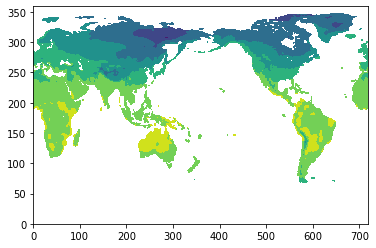

In [6]:
plt.contourf(ds['air'][0,:,:])

### How to calculate the climatology for monthly averaged data

The average value of a variable at a given location due to the seasonal cycle.  

For *monthly* averaged data we typically calculate the climatology as the average value for a given month over all years.

Mathematically, let _T_ be temperature, then
_T(i,j)_ is the temperature at some point (_i_,_j_). 

If we have _N_ years of data, then we can calulate the climatology of the temperature at a point (_i_,_j_) for a given month (_m_) as: 

\begin{equation}
\overline{T_m(i,j)} = \frac{1}{N}\sum_{k=1}^NT_{m,k}(i,j)
\end{equation}

#### Pick a point with data (Washington DC 38.9072° N, 77.0369° W)

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Washington DC Temperature (K)')

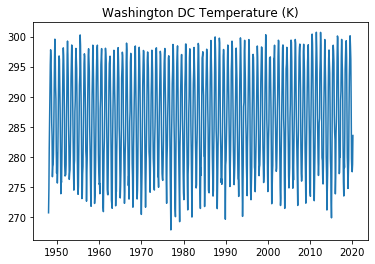

In [7]:
ds_pt=ds.sel(lat=39,lon=360-77,method='nearest')
plt.plot(ds_pt['time'],ds_pt['air'])
plt.title('Washington DC Temperature (K)')

### We can calculate the climatology using `groupby`

We can use `groupby` to group over `time.month` and then apply the mean function to that grouping to get the average value for a given month over our entire grid.

In [8]:
ds_climo=ds.groupby('time.month').mean(dim='time')
ds_climo

/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, month: 12)
Coordinates:
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

#### Look at our climatology
Plot the climatology along with the data for 1950 and data for 2019 for Washington DC

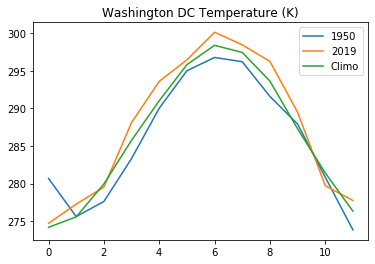

In [9]:
ds_ptclimo=ds_climo.sel(lat=39,lon=360-77,method='nearest')
ds_pt1950=ds_pt.sel(time=slice('1950-01-01','1950-12-01'))
ds_pt2019=ds_pt.sel(time=slice('2019-01-01','2019-12-01'))
                    
plt.plot(ds_pt1950['air'])
plt.plot(ds_pt2019['air'])                    
plt.plot(ds_ptclimo['air'])
plt.title('Washington DC Temperature (K)')
plt.legend(['1950','2019','Climo'])

#### Calculate Anomalies by subtracting the climatology from the original data

\begin{equation}
T_{m,k}^{\prime}(i,j) = T_{m,k}(i,j) - \overline{T_m(i,j)}
\end{equation}

In [10]:
ds_anoms=ds.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 867)
Coordinates:
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-03-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 5 6 7 8 9 10 11 12 1 2 3
Data variables:
    air      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

Text(0.5, 1.0, 'Washington DC Temperature Anomalies (K)')

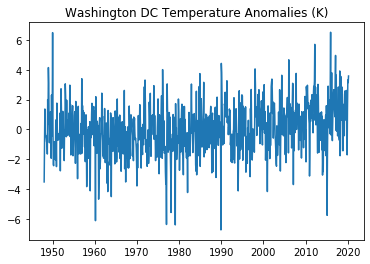

In [11]:
ds_anomspt=ds_anoms.sel(lat=39,lon=360-77,method='nearest')
plt.plot(ds_anomspt['time'],ds_anomspt['air'])
plt.title('Washington DC Temperature Anomalies (K)')

### Normalized Colorbars

Now that we have anomalies, we often wish to plot with a diverging colorbar centered at zero. Let's demonstrate how to center our colorbar at zero. (Thanks to a question from Douglas and answer from Zak last week)

#### Plot with off center range and colorbar

Text(0.5, 1.0, 'NOAA/NCEP GHCN CAMS Monthly Temperature')

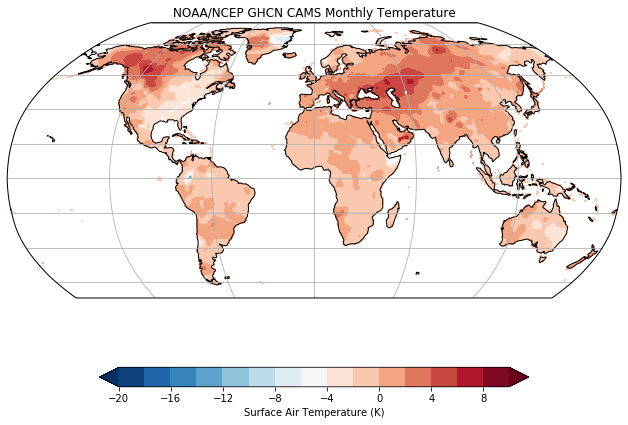

In [15]:
clevs=np.arange(-20,11,2)
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(ds_anoms['lon'], ds_anoms['lat'], 
               ds_anoms['air'][0,:,:],clevs,
               transform = ccrs.PlateCarree(),cmap='RdBu_r',
               extend='both')
ax.coastlines()
ax.gridlines()
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',
                    label='Surface Air Temperature (K)')
plt.title(ds.attrs['title'])

### Center the colorbar at zero

In [19]:
import matplotlib.colors as colors

Text(0.5, 1.0, 'NOAA/NCEP GHCN CAMS Monthly Temperature')

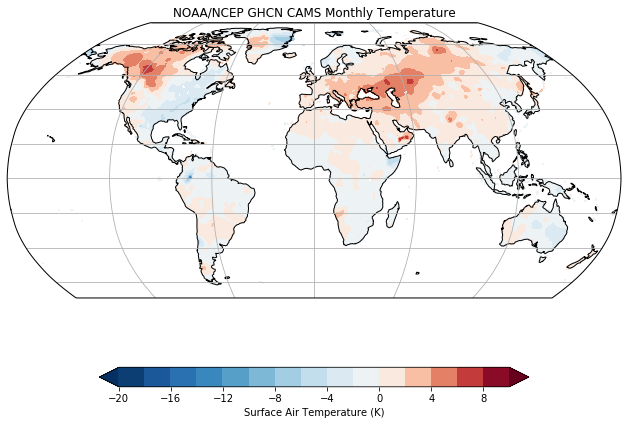

In [20]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.Robinson())
divnorm=colors.DivergingNorm(vcenter=0)
norm=divnorm
cs=ax.contourf(ds_anoms['lon'], ds_anoms['lat'], 
               ds_anoms['air'][0,:,:],clevs,
               transform = ccrs.PlateCarree(),
               norm=divnorm,cmap='RdBu_r',extend='both')
ax.coastlines()
ax.gridlines()
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',
                    label='Surface Air Temperature (K)')
plt.title(ds.attrs['title'])

### Calculating climatology for daily or higher frequency data

This is more complicated and more controversial in terms of the method to use.  It also gets us into some issues of handling large datasets depending on how much data there is, which we will talk about in more detail in another class.  

#### We can start by calculating the average over all years for each day

Data: Daily Precipitation from CPC over Continental US (CONUS)
https://kpegion.github.io/COLA-DATASETS-CATALOG/precip.V1.0.nc

In [21]:
path_daily='/shared/obs/gridded/CPC-PRECIP-CONUS/daily/'
files_daily='precip.V1.0.*.nc'

In [22]:
ds_daily=xr.open_mfdataset(path_daily+files_daily,
                           concat_dim='time',combine='nested')
ds_daily

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 21550)
Coordinates:
  * lat      (lat) float32 20.125 20.375 20.625 20.875 ... 49.375 49.625 49.875
  * lon      (lon) float32 230.125 230.375 230.625 ... 304.375 304.625 304.875
  * time     (time) datetime64[ns] 1948-01-01 1948-01-02 ... 2006-12-31
Data variables:
    precip   (time, lat, lon) float32 dask.array<chunksize=(366, 120, 300), meta=np.ndarray>
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created V1.0 starting 04/2010 by CAS from data...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

In [23]:
ds_daily_climo=ds_daily.groupby('time.dayofyear').mean()
ds_daily_climo

<xarray.Dataset>
Dimensions:    (dayofyear: 366, lat: 120, lon: 300)
Coordinates:
  * lat        (lat) float32 20.125 20.375 20.625 ... 49.375 49.625 49.875
  * lon        (lon) float32 230.125 230.375 230.625 ... 304.375 304.625 304.875
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    precip     (dayofyear, lat, lon) float32 dask.array<chunksize=(1, 120, 300), meta=np.ndarray>

/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5, 1.0, 'CPC Precipitation')

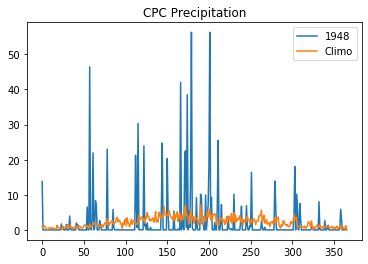

In [28]:
daily_pt=ds_daily['precip'].sel(lat=39,lon=360-97,method='nearest')
daily_ptclimo=ds_daily_climo['precip'].sel(lat=39,lon=360-97,method='nearest')
daily_pt1948=daily_pt.sel(time=slice('1948-01-01','1948-12-31'))

plt.plot(daily_pt1948)
plt.plot(daily_ptclimo)
plt.legend(['1948','Climo'])
plt.title('CPC Precipitation')

#### This version of climatology will be very noisy. 

This means if varies a lot from day to day.  Since what we really want in a climatology is to identify the seasonal cycle, which means the wet and dry parts of the year, typically we would smooth this daily climatology in some way or try to identify a cyclical part of the data with a seasonal timescale. Here, I will demonstrate smoothing.

In [36]:
daily_climo_smooth=ds_daily_climo.rolling(dayofyear=30,center=True).mean()

ValueError: For window size 30, every chunk should be larger than 15, but the smallest chunk size is 1. Rechunk your array
with a larger chunk size or a chunk size that
more evenly divides the shape of your array.

Here I get an error that is telling me that my data is too large for the computer to handle smoothing it.  It tells me what I can do to deal with it. It is trying to `chunk` my data into pieces so that it can work on separate parts of it instead of all of it at the same time. It is using something called `dask` behind the scenes to handle my data in parallel.  We will talk more about this next week -- for now I will just do what it says.

In [39]:
ds_daily_climo=ds_daily_climo.chunk({'dayofyear':-1})
daily_climo_smooth=ds_daily_climo.rolling(dayofyear=30,center=True).mean()

/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [40]:
ds_smoothpt=daily_climo_smooth['precip'].sel(lat=39,lon=360-97,method='nearest')

/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5, 1.0, 'CPC Precipitation')

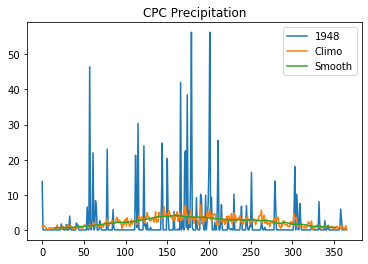

In [42]:
plt.plot(daily_pt1948)
plt.plot(daily_ptclimo)
plt.plot(ds_smoothpt)
plt.legend(['1948','Climo','Smooth'])
plt.title('CPC Precipitation')